#### Methods and models for multivariate analysis. Lab 4

In [1]:
# Libraries import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 12.0
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('MSFT.csv', error_bad_lines=False,encoding= 'unicode_escape')
df

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Date_col,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,17.97,17.98,17.80,17.86,46924400,0.384549,19.023098,17.484902,17.97,17.91,17.70,17.81,17.99,17.844,17.911,18.2540,19.0262,18.58480,17.891061,17.891061,17.891061,17.891061,17.891061,-0.341530,-0.329186,0.271273,40.465948,1333.333333,-3.823371,33.044146,-84.251969,15.748031,0.007260,-5161684.0,-50209108.0,2005-10-17,17,0,290,42,0,0,0,0,0,0,0,2005,10,33.65,33.55,33.30,33.61,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,17.89
1,2005-10-18,17.83,18.08,17.80,17.89,69328200,0.368394,18.944289,17.470711,17.86,17.97,17.91,17.78,17.97,17.866,17.881,18.2075,18.9900,18.57780,17.890708,17.890708,17.890708,17.890708,17.890708,-0.328778,-0.329105,0.271897,39.942915,1333.333333,-1.649258,34.265354,-81.889764,18.110236,0.007153,2079846.0,-64475226.0,2005-10-18,18,1,291,42,0,0,0,0,0,0,0,2005,10,33.42,33.65,33.55,33.44,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,18.27
2,2005-10-19,17.88,18.27,17.84,18.27,66574500,0.359387,18.911774,17.474226,17.89,17.86,17.97,17.70,17.83,17.980,17.911,18.1930,18.9582,18.57230,18.017138,18.017138,18.017138,18.017138,18.017138,-0.284726,-0.320229,0.283190,38.148273,1333.333333,1.669449,47.361696,-50.806452,49.193548,0.010470,25298310.0,-19306605.0,2005-10-19,19,2,292,42,0,0,0,0,0,0,0,2005,10,34.09,33.42,33.65,33.05,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,18.05
3,2005-10-20,18.24,18.30,18.02,18.05,58830600,0.355440,18.883881,17.462119,18.27,17.89,17.86,17.91,17.88,18.008,17.915,18.1730,18.9278,18.56595,18.028092,18.028092,18.028092,18.028092,18.028092,-0.264518,-0.309087,0.282962,36.294267,1333.333333,0.222099,42.128624,-63.888889,36.111111,0.012595,-12942732.0,-23532240.0,2005-10-20,20,3,293,42,0,0,0,0,0,0,0,2005,10,33.77,34.09,33.42,33.30,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,18.05
4,2005-10-21,18.14,18.21,17.89,18.05,69431200,0.352278,18.860056,17.450944,18.05,18.27,17.89,17.97,18.24,18.024,17.929,18.1555,18.8928,18.55970,18.035395,18.035395,18.035395,18.035395,18.035395,-0.245671,-0.296404,0.285607,35.177496,1333.333333,0.781686,42.128624,-53.012048,46.987952,0.012569,0.0,-24300920.0,2005-10-21,21,4,294,42,0,0,0,0,0,0,0,2005,10,33.98,33.77,34.09,33.55,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,18.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,2020-08-07,214.85,215.70,210.93,212.48,27789600,4.893286,217.618572,198.045428,216.35,212.94,213.29,205.01,212.34,214.320,209.044,207.8320,201.0002,171.71495,212.673974,212.673974,212.673974,212.673974,212.673974,3.181860,2.765197,5.569604,21.196988,1333.333333,5.553900,56.846318,-25.633383,74.366617,0.030344,-107545752.0,-33069624.0,2020-08-07,7,4,220,32,0,0,0,0,0,0,1,2020,8,271.47,274.64,271.05,265.79,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,208.25
3728,2020-08-10,211.67,211.88,206.35,208.25,36716500,4.890728,217.672456,198.109544,212.48,216.35,212.94,216.54,214.85,212.662,209.484,207.8910,201.5002,172.07610,211.199316,211.199316,211.199316,211.199316,211.199316,2.794806,2.771119,5.609632,20.439443,1333.333333,2.158450,51.646242,-46.646796,53.353204,0.015044,-155310795.0,43325470.0,2020-08-10,10,0,223,33,0,0,0,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3732 non-null   object 
 1   Open              3732 non-null   float64
 2   High              3732 non-null   float64
 3   Low               3732 non-null   float64
 4   Close(t)          3732 non-null   float64
 5   Volume            3732 non-null   int64  
 6   SD20              3732 non-null   float64
 7   Upper_Band        3732 non-null   float64
 8   Lower_Band        3732 non-null   float64
 9   S_Close(t-1)      3732 non-null   float64
 10  S_Close(t-2)      3732 non-null   float64
 11  S_Close(t-3)      3732 non-null   float64
 12  S_Close(t-5)      3732 non-null   float64
 13  S_Open(t-1)       3732 non-null   float64
 14  MA5               3732 non-null   float64
 15  MA10              3732 non-null   float64
 16  MA20              3732 non-null   float64


In [4]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.0,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.00000
mean,48.358915,48.820691,47.879879,48.375560,4.823395e+07,1.151065,50.192147,45.587885,48.324453,48.273199,48.223446,48.120247,48.307615,48.273814,48.144309,47.890016,47.140914,43.970086,48.273280,48.273280,48.273280,48.273280,48.273280,0.350726,0.347856,1.014750,24.024410,1.333333e+03,0.765626,54.460557,-41.512583,58.487417,0.014276,3.716916e+05,1.908676e+07,15.746249,2.022240,182.881833,26.521168,0.033762,0.030279,0.010450,0.008039,0.002680,0.0,0.244105,2012.706592,6.515005,88.168998,88.104976,88.041053,87.851645,87.882907,87.573303,86.677655,1802.140268,1801.554293,1799.223352,16115.084448,16110.365965,16091.619116,48.42675
std,42.468453,42.912174,41.976828,42.484718,2.981260e+07,1.480610,43.991182,39.477485,42.406452,42.327492,42.254189,42.092838,42.389381,42.318385,42.105363,41.690277,40.448340,35.794311,42.311922,42.311922,42.311922,42.311922,42.311922,1.078054,1.010257,1.224458,9.933706,3.353502e-13,4.556153,11.740350,29.313488,29.313488,0.010986,9.220280e+07,2.507258e+08,8.750061,1.399846,104.866334,14.969721,0.180640,0.171376,0.101704,0.089309,0.051702,0.0,0.429613,4.294933,3.433644,56.253648,56.179742,56.106276,55.892295,55.901003,55.530655,54.491380,649.993978,649.562660,647.877979,5605.625910,5603.116874,5593.480623,42.56296
min,11.710000,12.030000,11.450000,11.670000,7.425600e+06,0.134613,13.719004,11.093989,11.670000,11.670000,11.670000,11.670000,11.710000,11.968000,12.283000,12.666000,13.481000,15.527700,11.946229,11.946229,11.946229,11.946229,11.946229,-8.814370,-7.115432,0.216926,7.483195,1.333333e+03,-21.629621,16.902208,-100.000000,0.000000,0.000594,-2.052603e+09,-4.332882e+09,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.000000,1.000000,22.770000,22.770000,22.770000,22.770000,24.048000,24.828500,25.837200,676.530000,676.530000,676.530000,6547.050000,6547.050000,6547.050000,11.67000
25%,21.210000,21.430000,21.010000,21.207500,2.801850e+07,0.440017,22.238191,20.101007,21.200000,21.200000,21.200000,21.200000,21.207500,21.202500,21.203250,21.183250,21.254150,20.989363,21.197417,21.197417,21.197417,21.197417,21.197417,-0.125594,-0.113491,0.418294,16.532189,1.333333e+03,-1.546220,46.539995,-65.610072,34.389928,0.007848,-9.250679e+06,-2.756024e+07,8.000000,1.000000,92.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2009.000000,4.000000,41.477500,41.465000,41.447500,41.420000,41.364500,41.257750,41.123750,1288.135000,1288.057500,1287.237500,11667.017500,11659.415000,11642.605000,21.21750
50%,26.595000,26.875000,26.370000,26.590000,4.244665e+07,0.671721,27.685148,25.069210,26.585000,26.570000,26.540000,26.520000,26.585000,26.538000,26.493000,26.220000,25.888000,24.887475,26.5475

### Step 1
#### Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

Target variables: 'High', 'Volume'

Predictors: 'DayofWeek', 'RSI', 'ForceIndex1', 'William%R'


In [5]:
df = df.convert_dtypes()

datetimes = pd.to_datetime(df["Date"])
df["Date"] = datetimes

target_columns = ['High', 'Volume']
predict_columns = ['DayofWeek', 'RSI', 'ForceIndex1', 'William%R']
target_df = df[['Date']+target_columns+predict_columns]
target_df

,Date,High,Volume,DayofWeek,RSI,ForceIndex1,William%R
0,2005-10-17,17.98,46924400,0,33.044146,-5161684.0,-84.251969
1,2005-10-18,18.08,69328200,1,34.265354,2079846.0,-81.889764
2,2005-10-19,18.27,66574500,2,47.361696,25298310.0,-50.806452
3,2005-10-20,18.3,58830600,3,42.128624,-12942732.0,-63.888889
4,2005-10-21,18.21,69431200,4,42.128624,0.0,-53.012048
...,...,...,...,...,...,...,...
3727,2020-08-07,215.7,27789600,4,56.846318,-107545752.0,-25.633383
3728,2020-08-10,211.88,36716500,0,51.646242,-155310795.0,-46.646796
3729,2020-08-11,207.65,36446500,1,46.385327,-177494455.0,-70.839543
3730,2020-08-12,210.28,28041400,2,52.590069,162920534.0,-41.977149


<Figure size 864x720 with 0 Axes>

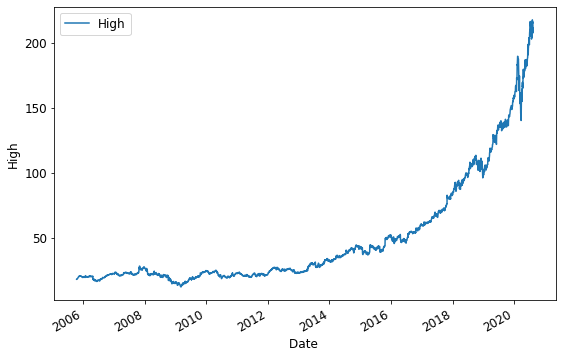

<Figure size 864x720 with 0 Axes>

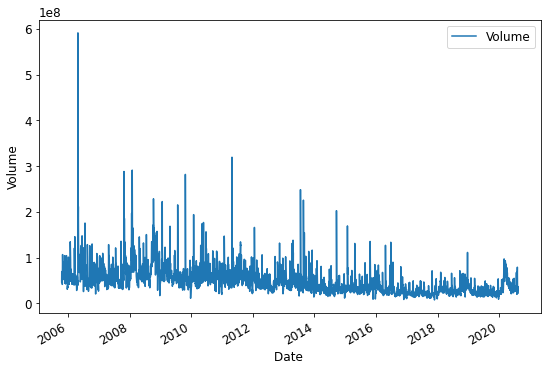

In [6]:
plt.figure(figsize=(12,10))
target_df.plot(x = 'Date', y = 'High', figsize=(9,6))
plt.xlabel(f'Date ' )
plt.ylabel(f'High')
plt.show()

plt.figure(figsize=(12,10))
target_df.plot(x = 'Date', y = 'Volume', figsize=(9,6))
plt.xlabel(f'Date ' )
plt.ylabel(f'Volume')
plt.show()

### Step 2 
#### Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.



In [7]:
import statsmodels.tsa.api as smt

for item in target_columns+predict_columns:
    result = smt.stattools.adfuller(target_df[item])
    item = 'WilliamR' if (item =='William%R') else item
    print(f'Augmented Dickey-Fuller test for {item}:\nStatistic value = %5f\np-value = %5f\n' % (result[0], result[1]))

Augmented Dickey-Fuller test for High:
Statistic value = 6.340654
p-value = 1.000000

Augmented Dickey-Fuller test for Volume:
Statistic value = -4.734458
p-value = 0.000072

Augmented Dickey-Fuller test for DayofWeek:
Statistic value = -12.041069
p-value = 0.000000

Augmented Dickey-Fuller test for RSI:
Statistic value = -8.954933
p-value = 0.000000

Augmented Dickey-Fuller test for ForceIndex1:
Statistic value = -12.729038
p-value = 0.000000

Augmented Dickey-Fuller test for WilliamR:
Statistic value = -11.920940
p-value = 0.000000



#### As we can see, 'Volume' timeseries can be considered stationary, while 'High' timeseries is certainly not stationary. All other variables seems to be stationary.

Lets make it more stationary

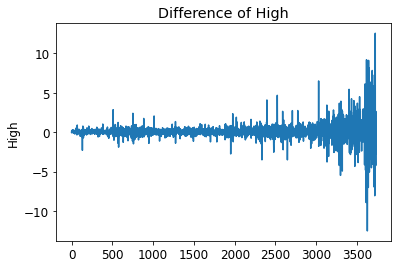

Augmented Dickey-Fuller test for High:
Statistic value = -13.452212
p-value = 0.000000



In [8]:
#trend subtraction using differences
def difference(dataset, interval):
    diff = list()
    diff.append(0)
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff, index = dataset.index)

diff_high = difference(dataset = target_df['High'], interval = 1)
target_df['diff_High'] = diff_high
target_columns = ['High', 'Volume', 'diff_High']


plt.plot(diff_high)
plt.ylabel(f'High')
plt.title('Difference of High')
plt.show()

result = smt.stattools.adfuller(diff_high)
print(f'Augmented Dickey-Fuller test for High:\nStatistic value = %5f\np-value = %5f\n' % (result[0], result[1]))

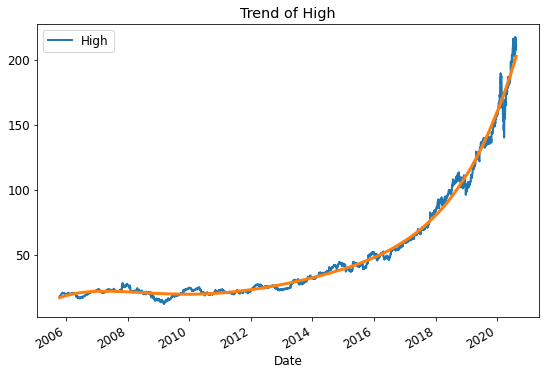

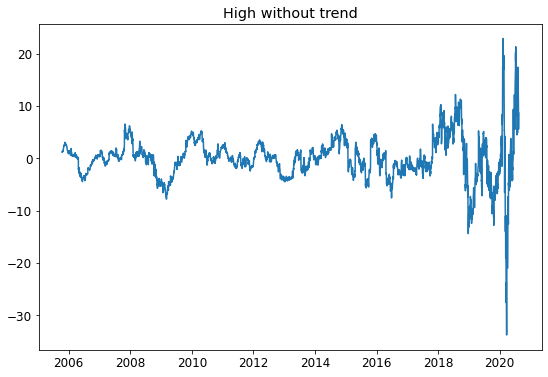

In [9]:
#find the trend
def trendline(data, order=9):
    #polynomial trend
    trend = np.polyfit(data.index.values, list(data), order)
    return np.poly1d(trend)(data.index.values)



trend = trendline(target_df['High'], 5)


target_df.plot(x = 'Date', y = 'High', linewidth=2, figsize=(9,6))
plt.plot(target_df['Date'], trend, linewidth=3)
plt.title('Trend of High')
plt.show()


plt.figure(figsize=(9,6))
plt.plot(list(target_df['Date'].values), list(target_df['High'].values - trend))
plt.title('High without trend')
plt.show()

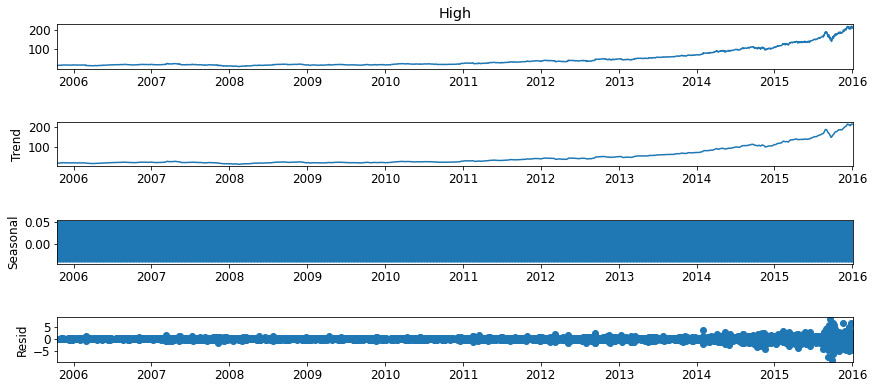

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

target_df.index = pd.date_range(freq="d", start = target_df['Date'].min(), periods=len(target_df.index))
sd_result = seasonal_decompose((target_df["High"]), model='additive')

fig = sd_result.plot()
fig.set_figheight(6)
fig.set_figwidth(14)
plt.show()



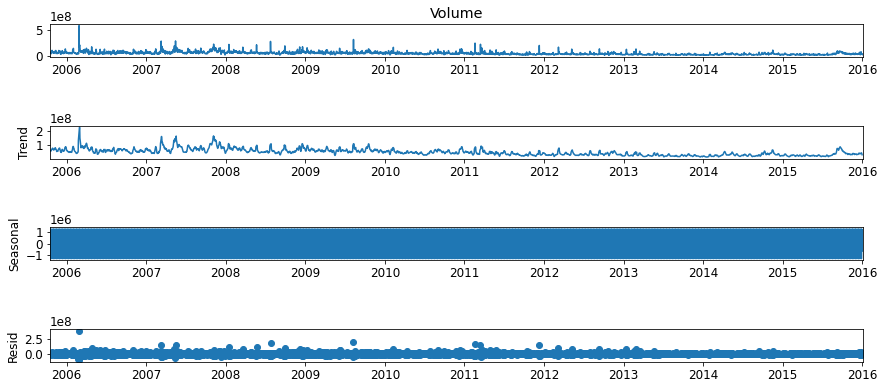

In [11]:
target_df.index = pd.date_range(freq="d", start = target_df['Date'].min(), periods=len(target_df.index))
sd_result = seasonal_decompose((target_df["Volume"]), model='additive')

fig = sd_result.plot()
fig.set_figheight(6)
fig.set_figwidth(14)
plt.show()

### Step 3
#### Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

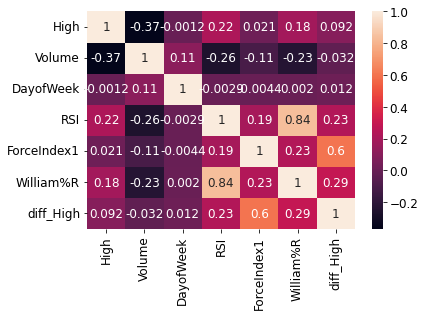

In [12]:
corrMatrix = target_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

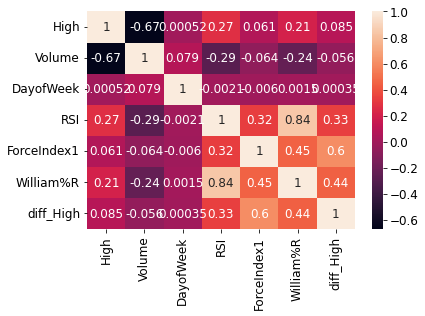

In [13]:
corrMatrix = target_df.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()

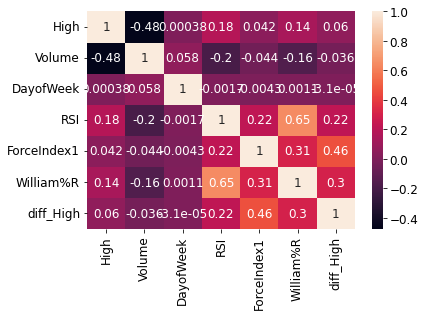

In [14]:
corrMatrix = target_df.corr(method = 'kendall')
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
covMatrix =  target_df.cov()
print(covMatrix.to_string(formatters={'cost':'${:,.2f}'.format}))


                     High        Volume     DayofWeek           RSI   ForceIndex1     William%R     diff_High
High         1.841455e+03 -4.719961e+08 -7.294757e-02  1.084426e+02  8.390132e+07  2.316737e+02  3.900043e+00
Volume      -4.719961e+08  8.887909e+14  4.681905e+06 -9.082849e+07 -3.047131e+14 -2.049344e+08 -9.418056e+05
DayofWeek   -7.294757e-02  4.681905e+06  1.959570e+00 -4.704762e-02 -5.680089e+05  8.182406e-02  1.720435e-02
RSI          1.084426e+02 -9.082849e+07 -4.704762e-02  1.378358e+02  2.096751e+08  2.874317e+02  2.706406e+00
ForceIndex1  8.390132e+07 -3.047131e+14 -5.680089e+05  2.096751e+08  8.501357e+15  6.275761e+08  5.478385e+07
William%R    2.316737e+02 -2.049344e+08  8.182406e-02  2.874317e+02  6.275761e+08  8.592806e+02  8.404988e+00
diff_High    3.900043e+00 -9.418056e+05  1.720435e-02  2.706406e+00  5.478385e+07  8.404988e+00  9.722523e-01


Autocovariance of N variables

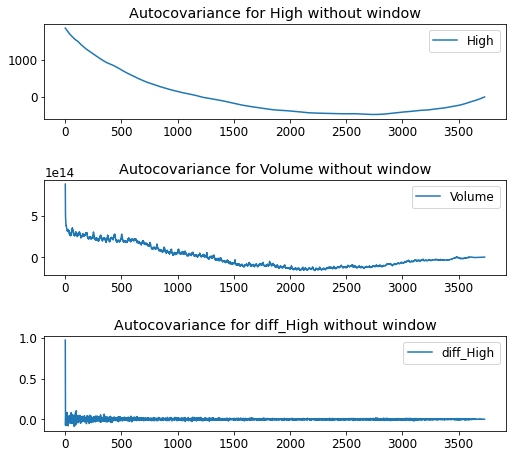

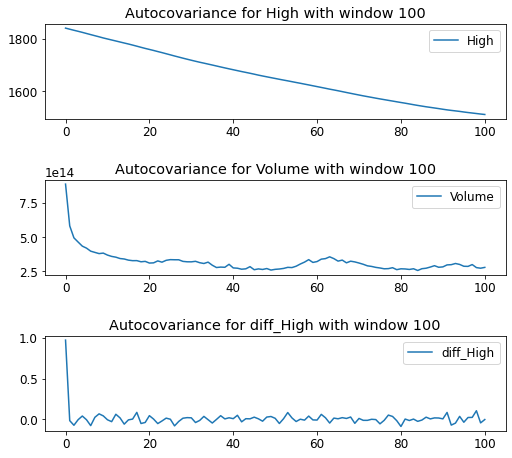

In [16]:
from statsmodels.tsa import stattools
N = 100
i = 0

fig, axs = plt.subplots( 3, figsize=(8, 7),squeeze=False)
fig.tight_layout(pad=3.0)
axs = axs.flat

for item in target_columns:
    axs[i].plot(stattools.acovf(target_df[item],fft=False), label = f'{item}') #autocovariance without window
    axs[i].legend(loc='best')
    axs[i].set_title(f'Autocovariance for {item} without window')
    i += 1
    
fig, axs = plt.subplots( 3, figsize=(8, 7),squeeze=False)
fig.tight_layout(pad=3.0)
axs = axs.flat
i=0

for item in target_columns:
    axs[i].plot(stattools.acovf(target_df[item], nlag=N, fft=False), label = f'{item}') #autocovariance without window
    axs[i].legend(loc='best')
    axs[i].set_title(f'Autocovariance for {item} with window {N}')
    i += 1
    
    

    

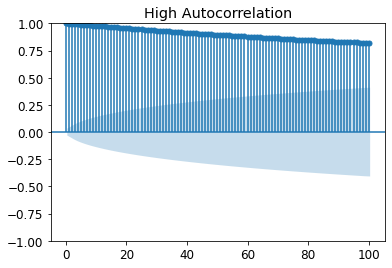

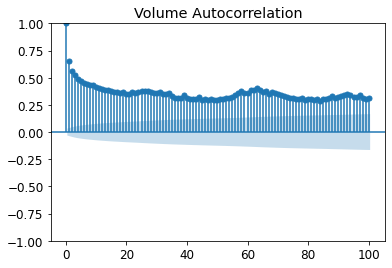

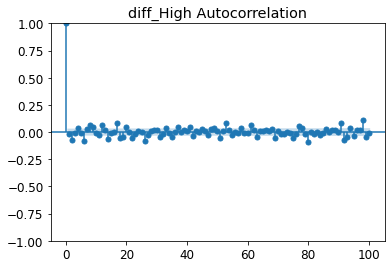

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

for item in target_columns:
    plot_acf(target_df[item], title=f'{item} Autocorrelation', lags = 100)



#### Mutual correlation plot

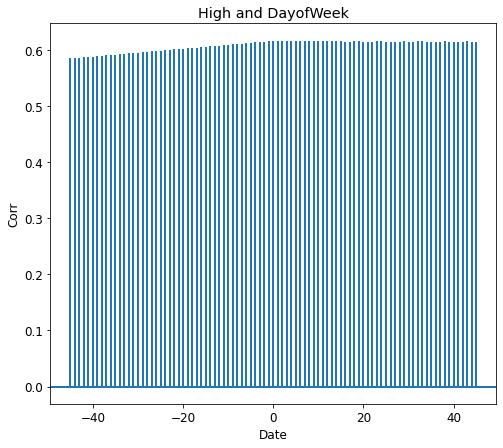

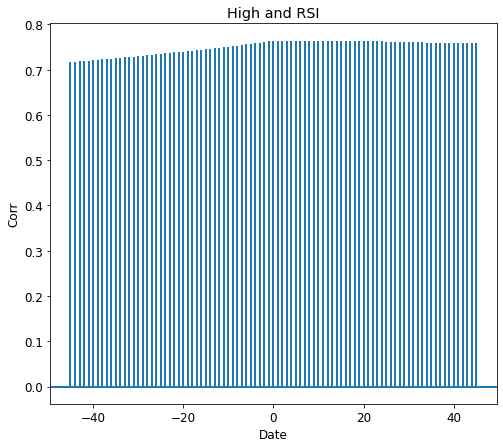

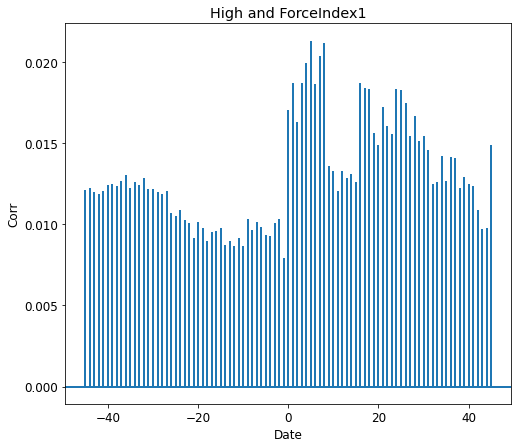

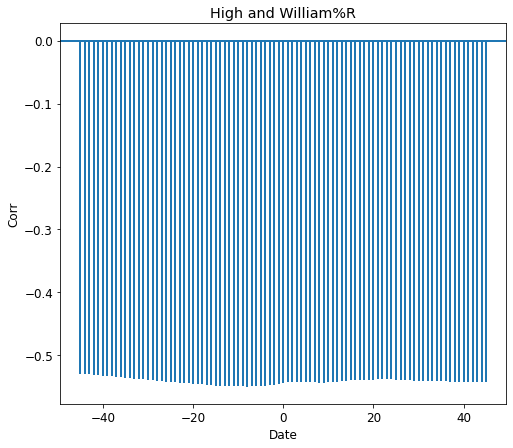

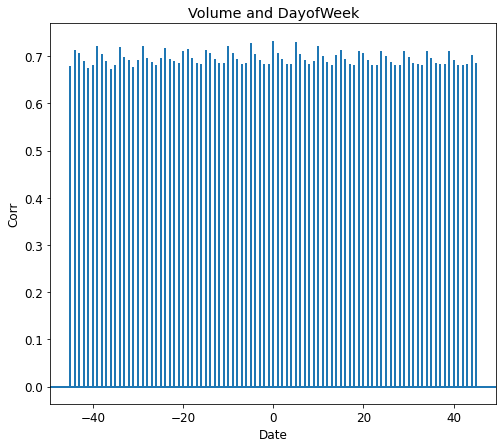

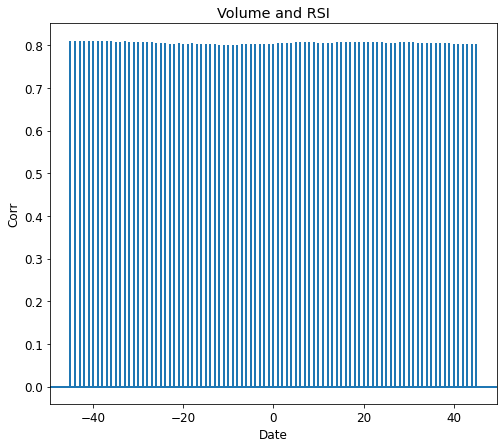

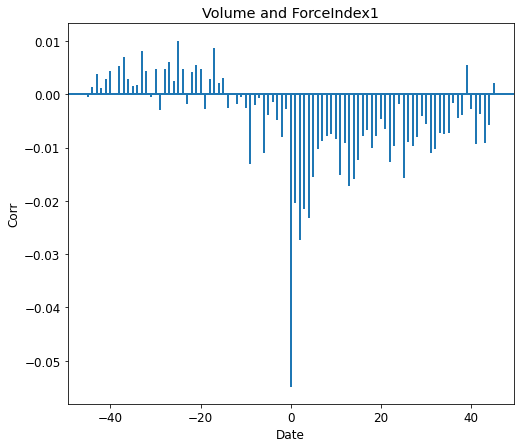

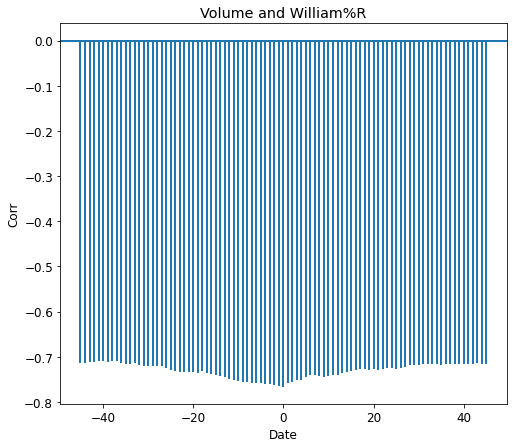

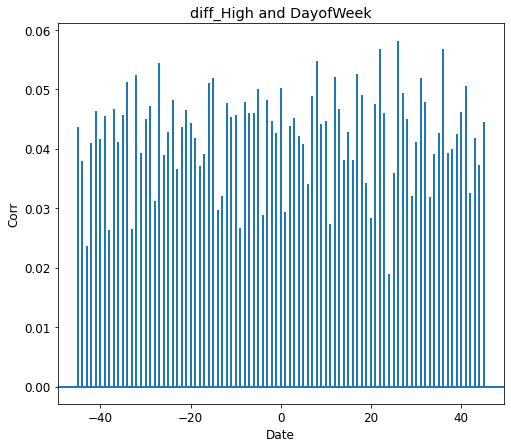

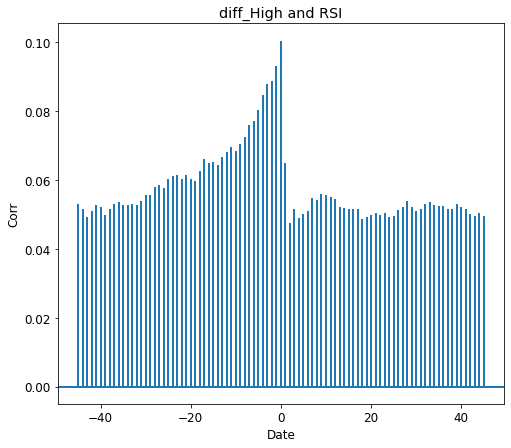

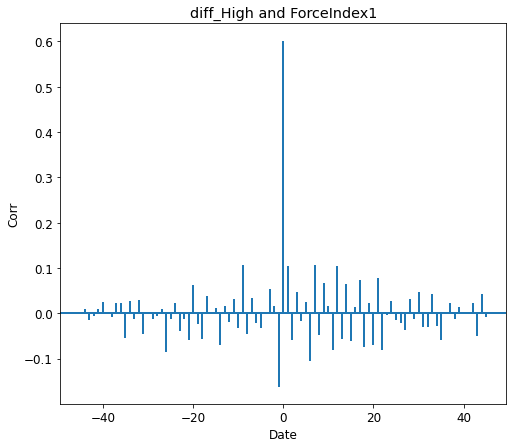

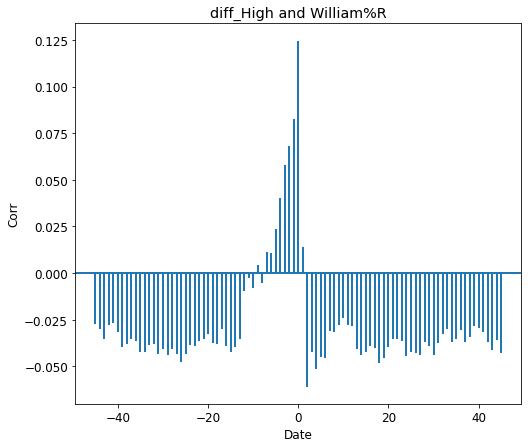

In [18]:

for target in target_columns:
    
    for pred in predict_columns:  
        fig, axs = plt.subplots(1,figsize=(8, 7))

        axs.xcorr(target_df[target].astype(float), target_df[pred].astype(float), usevlines=True, maxlags=45, normed=True, lw=2)
        axs.set_title(f"{target} and {pred}")
        axs.set_ylabel('Corr')
        axs.set_xlabel('Date')

        


## Step 4 - Filter high frequencies (noise) with chosen 2 filters for target variables.

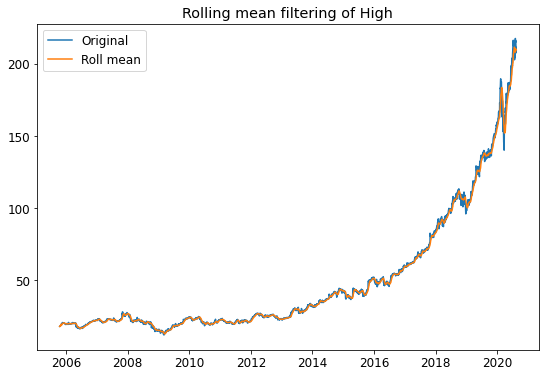

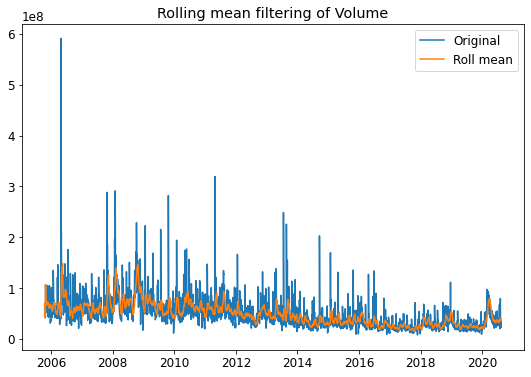

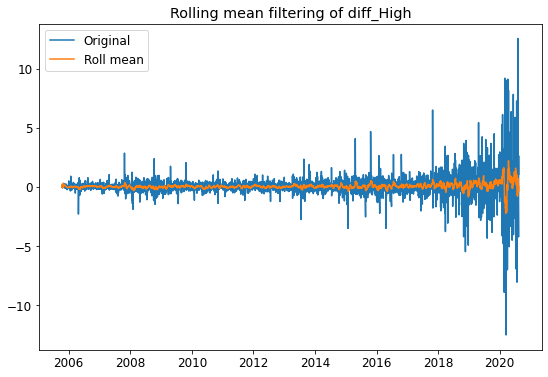

In [19]:
# Rolling mean filtering
i=1
filtered_df = target_df

for item in target_columns:
    variable_roll = target_df[item].head(14).values
    variable_roll = np.append(variable_roll, target_df[item].rolling(window=15).mean().iloc[15-1:].values)
    i+=1
    filtered_df[f'mean_{item}'] = variable_roll
    
    fig, axs = plt.subplots(figsize=(9, 6),squeeze=False)
    plt.plot(list(target_df['Date']), list(target_df[item]), label = f'Original')
    plt.plot(list(target_df['Date']), list(variable_roll), label = f'Roll mean')
    plt.title(f'Rolling mean filtering of {item}')
    plt.legend(loc='best')


                 Date    High    Volume  DayofWeek        RSI  ForceIndex1  \
2005-10-17 2005-10-17   17.98  46924400          0  33.044146   -5161684.0   
2005-10-18 2005-10-18   18.08  69328200          1  34.265354    2079846.0   
2005-10-19 2005-10-19   18.27  66574500          2  47.361696   25298310.0   
2005-10-20 2005-10-20    18.3  58830600          3  42.128624  -12942732.0   
2005-10-21 2005-10-21   18.21  69431200          4  42.128624          0.0   
...               ...     ...       ...        ...        ...          ...   
2015-12-31 2020-08-07   215.7  27789600          4  56.846318 -107545752.0   
2016-01-01 2020-08-10  211.88  36716500          0  51.646242 -155310795.0   
2016-01-02 2020-08-11  207.65  36446500          1  46.385327 -177494455.0   
2016-01-03 2020-08-12  210.28  28041400          2  52.590069  162920534.0   
2016-01-04 2020-08-13  211.35  22588900          3  52.043043  -11068561.0   

            William%R  diff_High   mean_High      mean_Volume  

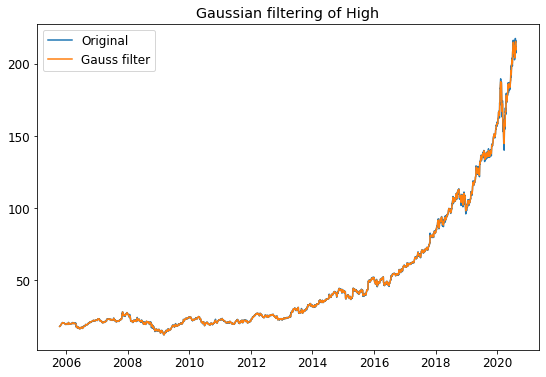

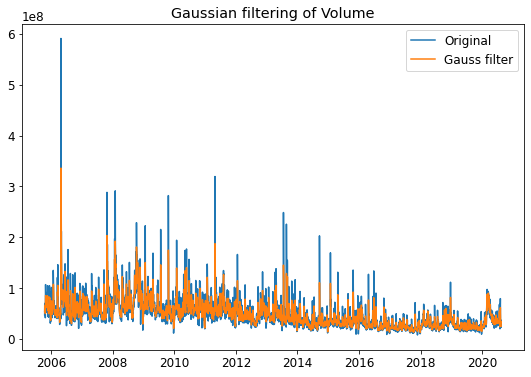

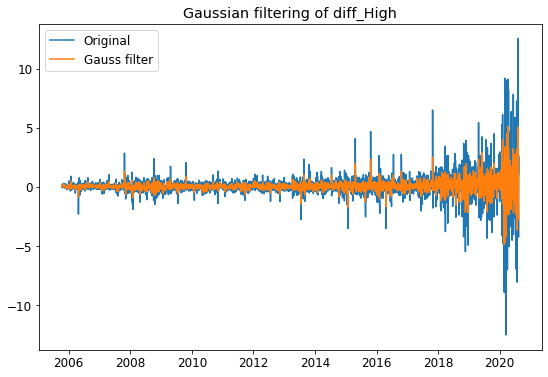

In [20]:
# Gaussian filter 
from scipy.ndimage import gaussian_filter1d


for item in target_columns:
    fig, axs = plt.subplots(figsize=(9, 6),squeeze=False)
    gauss_column = gaussian_filter1d(np.array(target_df[item], np.float), 0.90)
    filtered_df[f'gauss_{item}'] = gauss_column
    
    plt.plot(list(target_df['Date']), list(list(target_df[item])), label = f'Original')
    plt.plot(list(target_df['Date']), list(gauss_column), label = f'Gauss filter')
    plt.title(f'Gaussian filtering of {item}')
    plt.legend(loc='best')
    
print(filtered_df)

## Step 5 - Estimate spectral density function for with and without filtering.

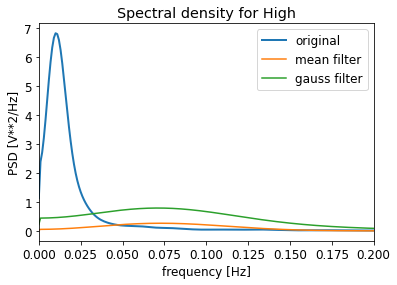

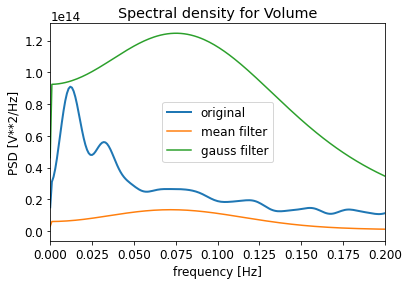

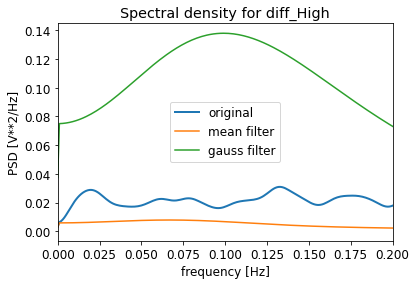

In [21]:
from scipy import signal
window_size = 15
blackman = signal.blackman(M=window_size)


#item_columns = target_columns + [f'mean_{item}' for item in target_columns] + [f'gauss_{item}' for item in target_columns]

for item in target_columns:
    f, Pxx_den = signal.welch(target_df[item], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
    f_window, Pxx_den_window = signal.welch(target_df[f'mean_{item}'], fs=1, window = blackman, nfft = 1000, scaling='spectrum')
    f_window2, Pxx_den_window2 = signal.welch(target_df[f'gauss_{item}'], fs=1, window = blackman, nfft = 1000, scaling='spectrum')

    #f_window_bart, Pxx_den_window_bart = signal.welch(target_df[item], fs=1, window = bartlett, nfft = 1000, scaling='spectrum')

    Pxx_den = [item.real for item in Pxx_den]
    f =  [item.real for item in f]
    f_window = [item.real for item in f_window]
    Pxx_den_window = [item.real for item in Pxx_den_window]
    f_window2 = [item.real for item in f_window2]
    Pxx_den_window2 = [item.real for item in Pxx_den_window2]
    #f_window_bart = [item.real for item in f_window_bart]
    #Pxx_den_window_bart = [item.real for item in Pxx_den_window_bart]

    plt.plot(f, Pxx_den, linewidth=2, label = 'original')
    plt.plot(f_window, Pxx_den_window, label = 'mean filter')
    plt.plot(f_window2, Pxx_den_window2, label = 'gauss filter')

    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend(loc='best')
    plt.title(f'Spectral density for {item}')
    plt.xlim((0,0.2))
    plt.show()

### Step 6 - Built auto-regression model filtered and non-filtered data. To analyze residual error and to define appropriate order of model.

In [32]:
from statsmodels.tsa.ar_model import AutoReg
X_data = filtered_df[predict_columns]
print(X_data)
Y_data = filtered_df[target_columns + [f'mean_{item}' for item in target_columns] + [f'gauss_{item}' for item in target_columns]]
print(Y_data)
 
test_size = 0.2
train_num = (len(Y_data)*(1-test_size))//1

            DayofWeek        RSI  ForceIndex1  William%R
2005-10-17          0  33.044146   -5161684.0 -84.251969
2005-10-18          1  34.265354    2079846.0 -81.889764
2005-10-19          2  47.361696   25298310.0 -50.806452
2005-10-20          3  42.128624  -12942732.0 -63.888889
2005-10-21          4  42.128624          0.0 -53.012048
...               ...        ...          ...        ...
2015-12-31          4  56.846318 -107545752.0 -25.633383
2016-01-01          0  51.646242 -155310795.0 -46.646796
2016-01-02          1  46.385327 -177494455.0 -70.839543
2016-01-03          2  52.590069  162920534.0 -41.977149
2016-01-04          3  52.043043  -11068561.0 -47.987118

[3732 rows x 4 columns]
              High    Volume  diff_High   mean_High      mean_Volume  \
2005-10-17   17.98  46924400       0.00       17.98         46924400   
2005-10-18   18.08  69328200       0.10       18.08         69328200   
2005-10-19   18.27  66574500       0.19       18.27         66574500   
200

In [33]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from numpy.linalg import LinAlgError

test_size = 0.2

# SARIMA parameters:
ps = range(0, 3)
d = 1
qs = range(0, 3)
Ps = range(0, 2)
D = 1
Qs = range(0, 1)

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(u"Models to analyse by AIC:", len(parameters_list))

Models to analyse by AIC: 18


In [34]:
target_list = target_columns + [f'mean_{item}' for item in target_columns] + [f'gauss_{item}' for item in target_columns]
#target_list = ['High', 'diff_High', 'Volume']
best_model = {t: None for t in target_list}
best_param = {t: None for t in target_list}

# ignore warnings 
warnings.filterwarnings('ignore')

# Working with SARIMAX model is too slow, so we dicided to fit simple AutoReg model 
# for item in target_list:
#     best_aic = float("inf")
    
#     X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data[item], test_size = test_size, shuffle = False)
    
#     for param in parameters_list:
#         #try except for the case of wrong parameters
#         try:
#             model = SARIMAX(y_train.astype(float), order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
            
#         except ValueError:
#             continue
            
#         aic = model.aic

#         # save best model, aic, parameters
#         if (aic < best_aic):
#             best_model[item] = model
#             best_param[item] = param
#             best_aic = aic

In [35]:
start_idx = len(target_df)*(1-test_size)//1

for item in target_list:
    best_aic = float("inf")
    X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data[item], test_size = test_size, shuffle = False)

    model = AutoReg(np.array(y_train, dtype=float), lags=1000)
    model_fit = model.fit()
    predict = model_fit.predict(start = int(start_idx), end = len(target_df[item])-1)

    best_model[item] = model_fit
    best_aic = model_fit.aic
            
            
    



In [36]:
for item in target_list:
    print(f'\n\n{item} \n-------------------------------------\n\n' )
    #print(best_model[item].summary())
    best_model[item].resid




High 
-------------------------------------




Volume 
-------------------------------------




diff_High 
-------------------------------------




mean_High 
-------------------------------------




mean_Volume 
-------------------------------------




mean_diff_High 
-------------------------------------




gauss_High 
-------------------------------------




gauss_Volume 
-------------------------------------




gauss_diff_High 
-------------------------------------




Residuals mean: 1.6005664188369728e-12 
Residuals std: 0.3252020189640837
ShapiroResult(statistic=0.9572572708129883, pvalue=1.0723928184590047e-23)


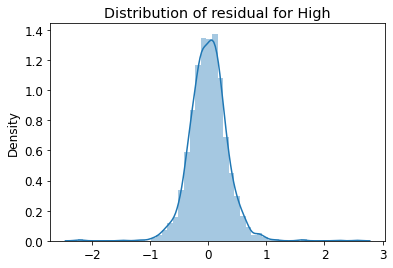

Residuals mean: 1.8430897210647238e-07 
Residuals std: 13865102.5408422
ShapiroResult(statistic=0.8919712901115417, pvalue=3.362353218803673e-35)


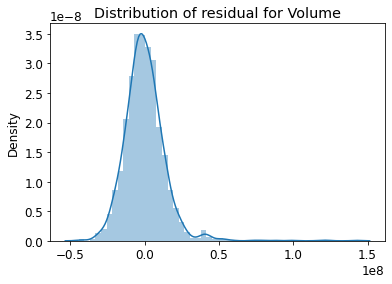

Residuals mean: -2.416203257622507e-17 
Residuals std: 0.3256028997951874
ShapiroResult(statistic=0.957108736038208, pvalue=9.812290545802248e-24)


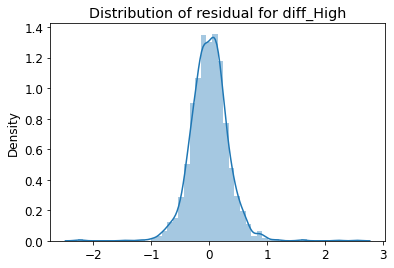

Residuals mean: 1.9989170799982603e-11 
Residuals std: 0.02180660819060246
ShapiroResult(statistic=0.9614068865776062, pvalue=1.4158899618529367e-22)


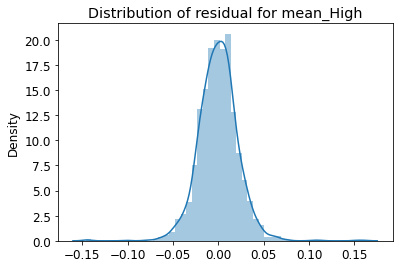

Residuals mean: 4.383850307848952e-07 
Residuals std: 931122.9177856696
ShapiroResult(statistic=0.8984453082084656, pvalue=2.3331997068612913e-34)


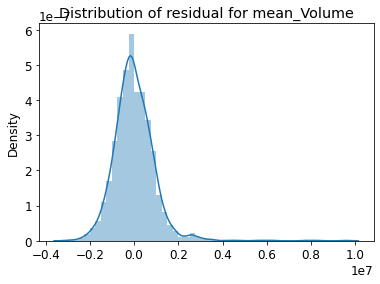

Residuals mean: 4.80248362767955e-16 
Residuals std: 0.02176582411392692
ShapiroResult(statistic=0.9642828702926636, pvalue=9.583929450128186e-22)


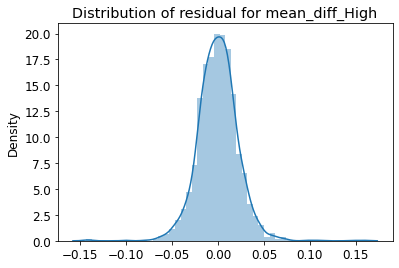

Residuals mean: 1.1052805466281754e-11 
Residuals std: 0.09047638587710459
ShapiroResult(statistic=0.9866928458213806, pvalue=1.2926155371767445e-12)


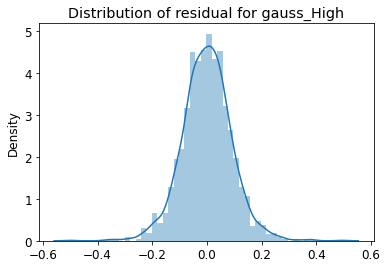

Residuals mean: -3.565236062787342e-06 
Residuals std: 3854763.6542150327
ShapiroResult(statistic=0.9581262469291687, pvalue=1.8116858064726353e-23)


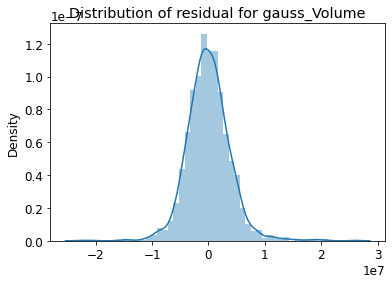

Residuals mean: -3.0314401982208307e-16 
Residuals std: 0.09052571567508078
ShapiroResult(statistic=0.9866448640823364, pvalue=1.2108017496612056e-12)


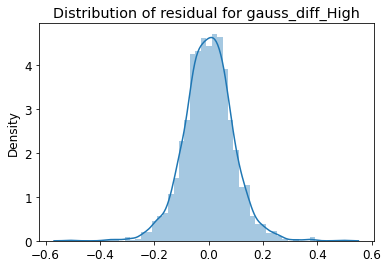

In [37]:
from scipy.stats import shapiro

for item in target_list:
    residuals = best_model[item].resid
    sns.distplot(residuals, kde=True, norm_hist=True)
    plt.title(f'Distribution of residual for {item}')
    print(f'Residuals mean: {residuals.mean()} \nResiduals std: {residuals.std()}\n{shapiro(residuals)}')
    plt.show()

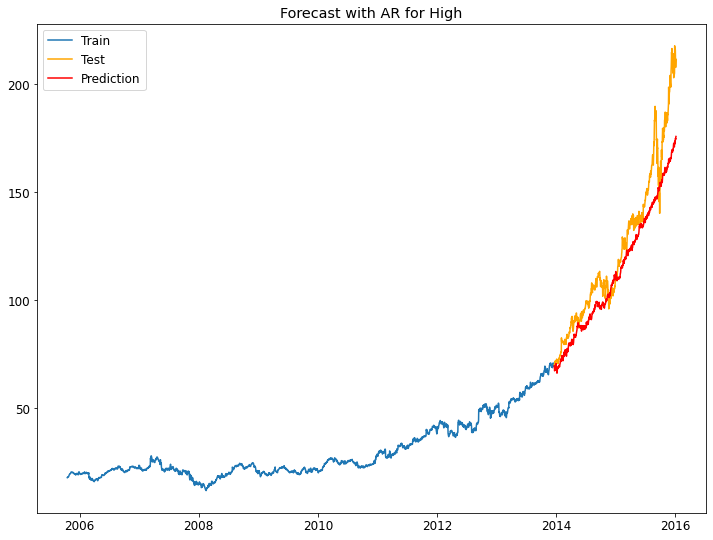

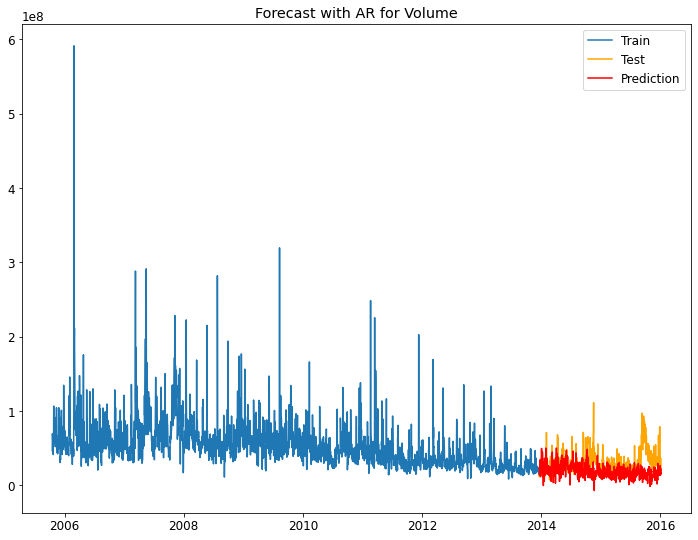

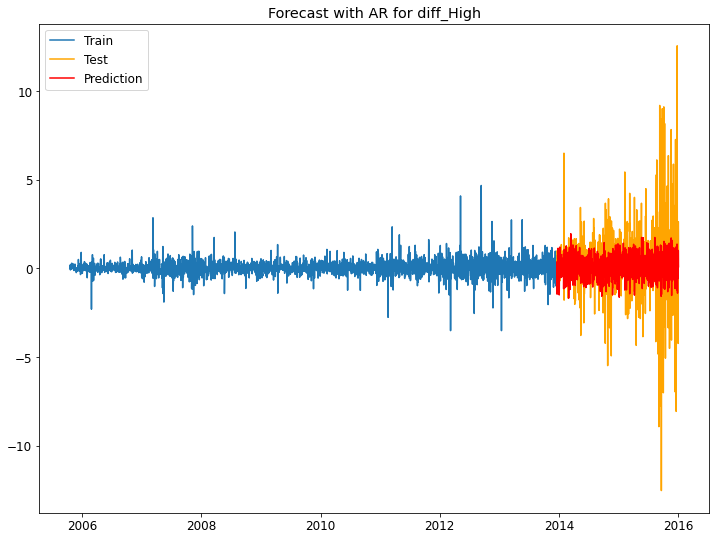

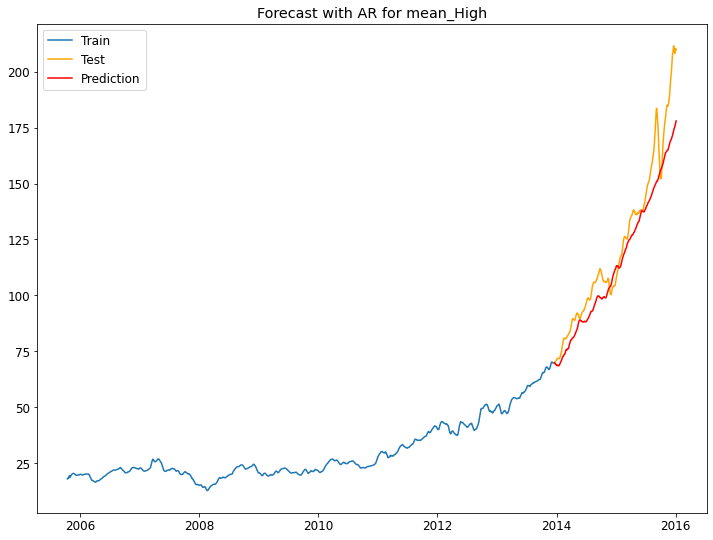

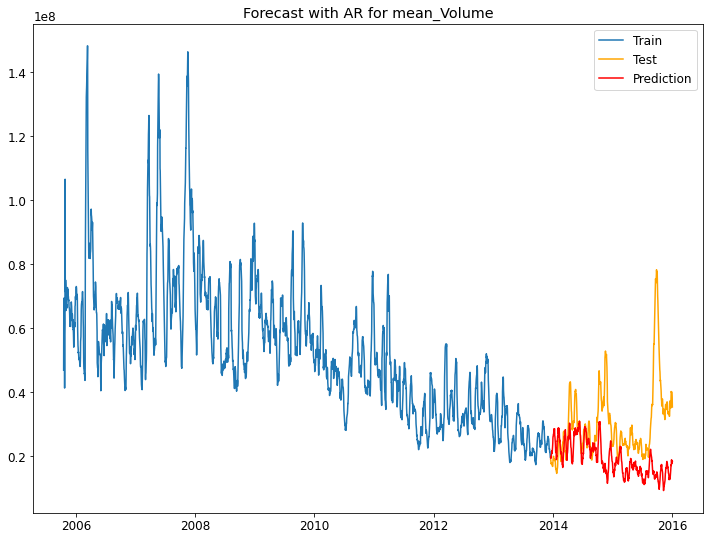

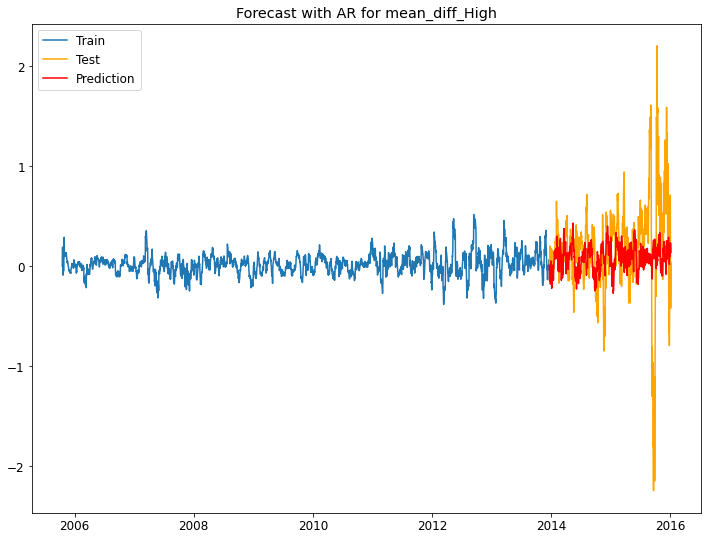

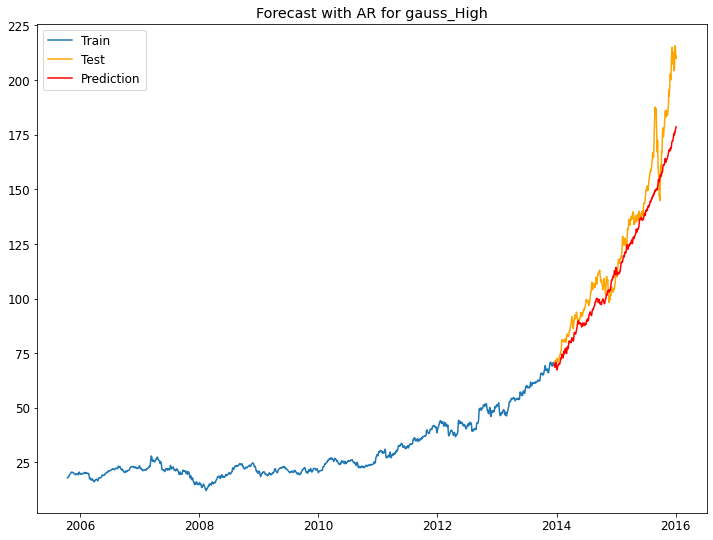

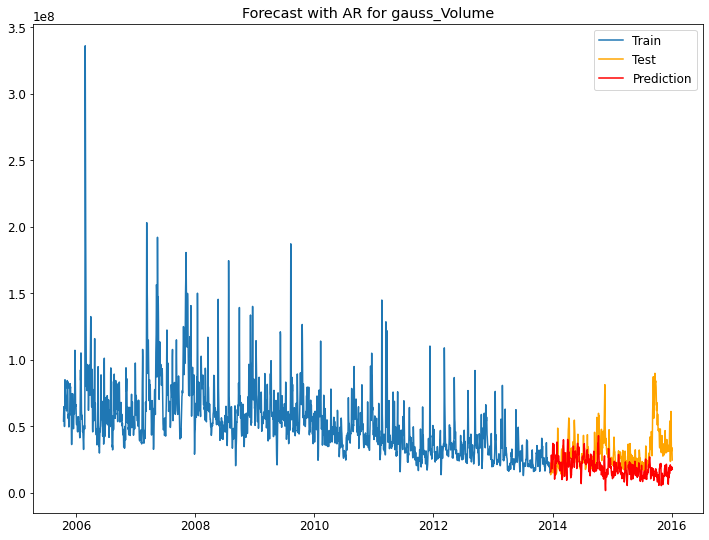

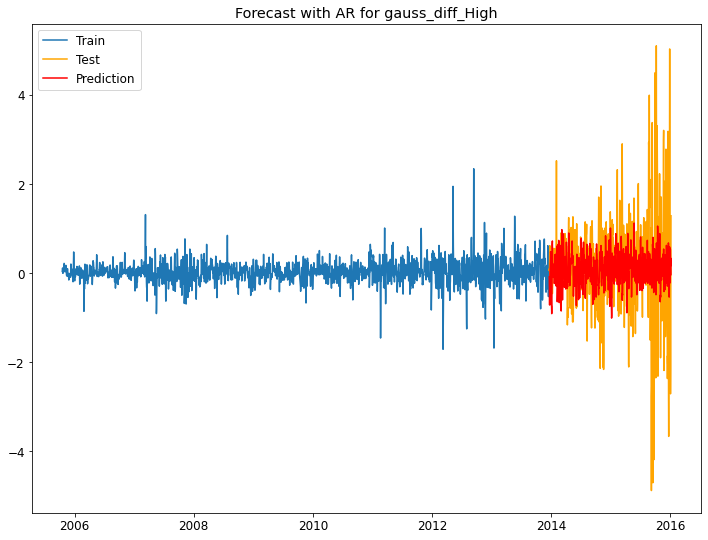

In [38]:
start_idx = len(target_df)*(1-test_size)//1

for item in target_list:
    X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data[item], test_size = test_size, shuffle = False)
    
    #predict = best_model[item].predict(start = int(start_idx), end = int(start_idx) + 365) # Forecast for 1 year
    
    predict = best_model[item].predict(start = int(start_idx), end = len(target_df) - 1) # Forecast for whole test period

    plt.figure(figsize=(12, 9))
    plt.plot(list(X_train.index.values), list(y_train.values))
    plt.plot(list(X_test.index.values), list(y_test.values), color = 'orange')
    #plt.plot(list(target_df.iloc[int(start_idx):int(start_idx+365)+1].index.values), predict, color="red")  # Forecast for 1 year
    #plt.xlim(('2013-01-01', '2015-01-01'))

    plt.plot(list(X_test.index.values), predict, color="red")  # Forecast whole test period
    
    plt.title(f'Forecast with AR for {item}')
    plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
    plt.savefig('dist_prediction_1')
    plt.show()

### Step 7 - Build model in a form of linear dynamical system, using chosen predictors. To analyze residual error and to define appropriate order of model.

In [40]:
from statsmodels.tsa.vector_ar.var_model import VAR

test_num = len(target_df)*(1-test_size)//1

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data[target_list], test_size = test_size, shuffle = False)

model = VAR(y_train.astype(float), X_train.astype(float))
model_fit = model.fit()
#model_fit.summary()


Residuals mean: 8.155370927280558e-13 
Residuals std: 0.05869950040102994
ShapiroResult(statistic=0.866135835647583, pvalue=7.006492321624085e-45)


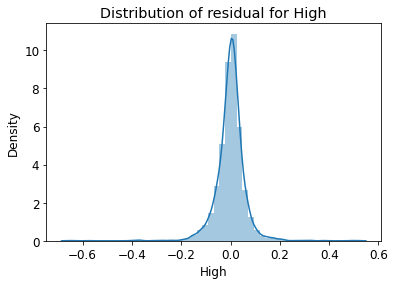

Residuals mean: 0.0003170548830850514 
Residuals std: 14312287.407640224
ShapiroResult(statistic=0.816652774810791, pvalue=0.0)


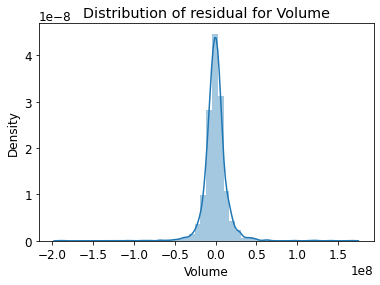

Residuals mean: 1.0429988381753626e-11 
Residuals std: 0.05869950040103061
ShapiroResult(statistic=0.866135835647583, pvalue=7.006492321624085e-45)


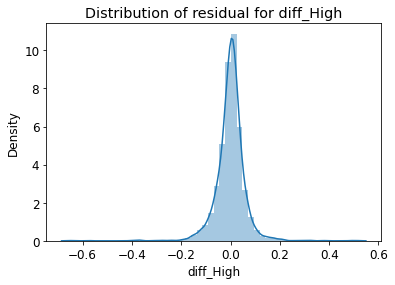

Residuals mean: -2.2180464197531205e-12 
Residuals std: 0.0304496187330008
ShapiroResult(statistic=0.703384280204773, pvalue=0.0)


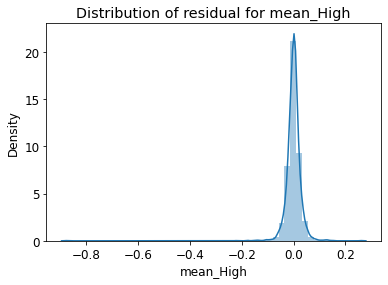

Residuals mean: -0.00019277287172727865 
Residuals std: 2098559.981508071
ShapiroResult(statistic=0.6889774799346924, pvalue=0.0)


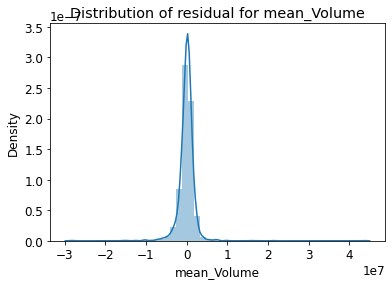

Residuals mean: -2.677700498776283e-12 
Residuals std: 0.025840149772238235
ShapiroResult(statistic=0.8963908553123474, pvalue=5.97233405495237e-41)


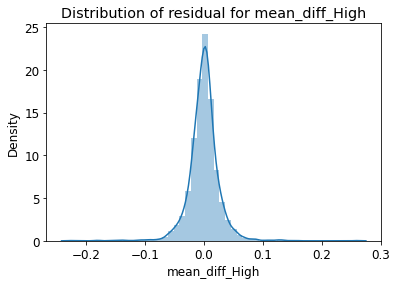

Residuals mean: 1.223999394541359e-11 
Residuals std: 0.07357024927857685
ShapiroResult(statistic=0.8731958866119385, pvalue=4.764414778704378e-44)


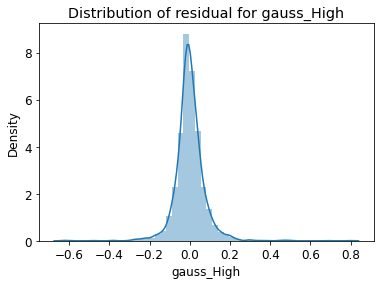

Residuals mean: 0.0009600775810732599 
Residuals std: 8553211.148383012
ShapiroResult(statistic=0.84632408618927, pvalue=0.0)


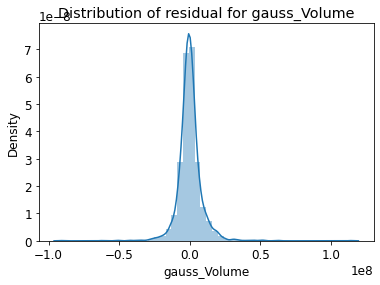

Residuals mean: -1.1257815353158533e-11 
Residuals std: 0.07357082526700436
ShapiroResult(statistic=0.8732080459594727, pvalue=4.764414778704378e-44)


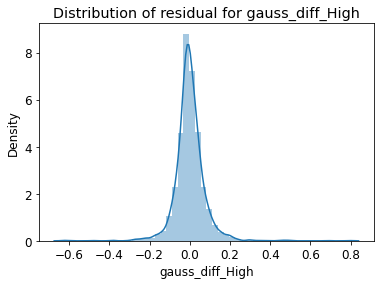

In [44]:
for item in model_fit.resid:
    residuals = model_fit.resid[item]
    sns.distplot(residuals, kde=True, norm_hist=True)
    plt.title(f'Distribution of residual for {item}')
    print(f'Residuals mean: {residuals.mean()} \nResiduals std: {residuals.std()}\n{shapiro(residuals)}')
    plt.show()

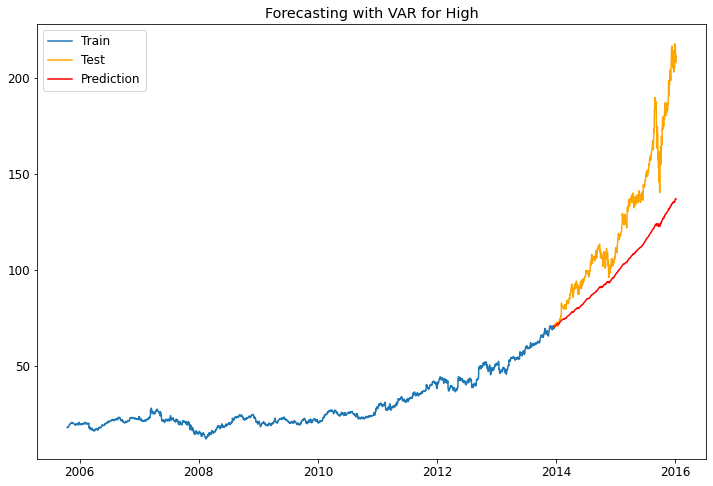

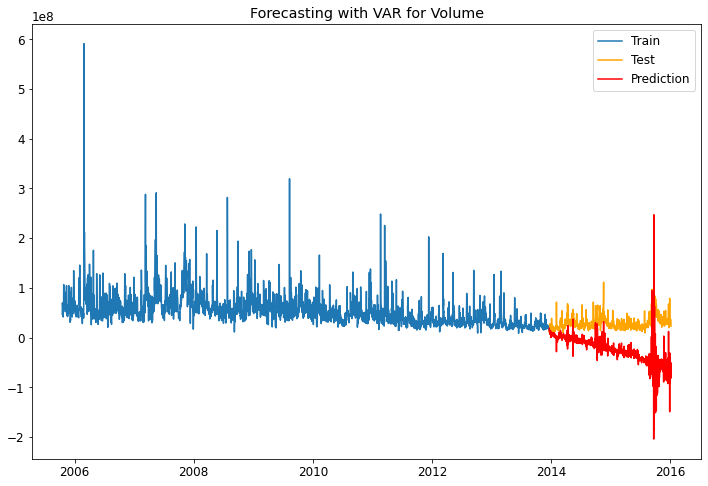

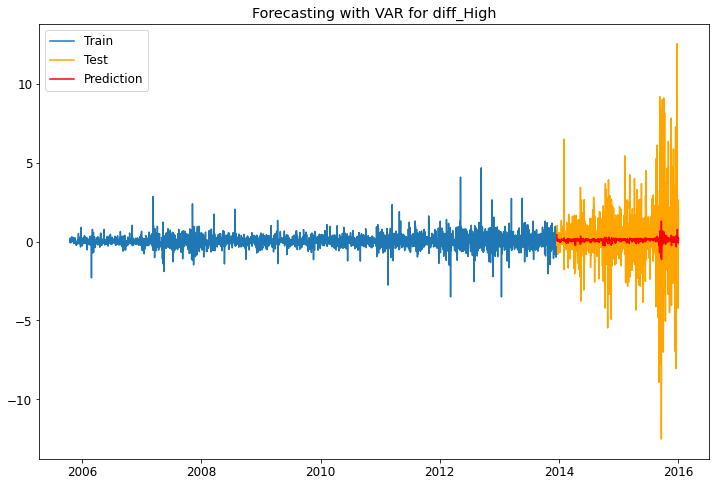

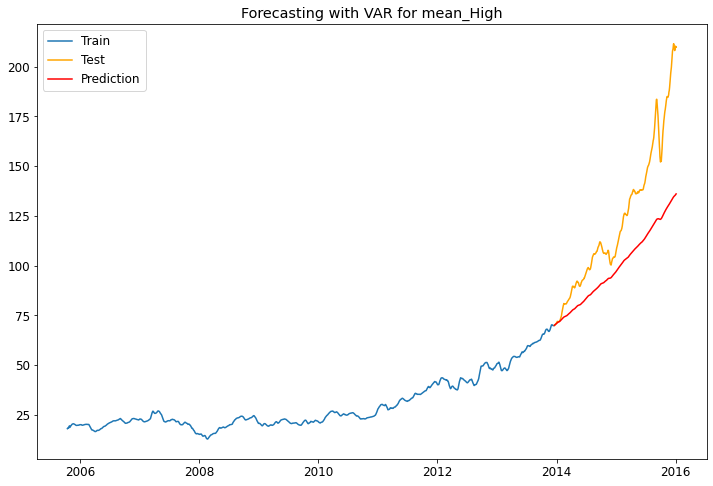

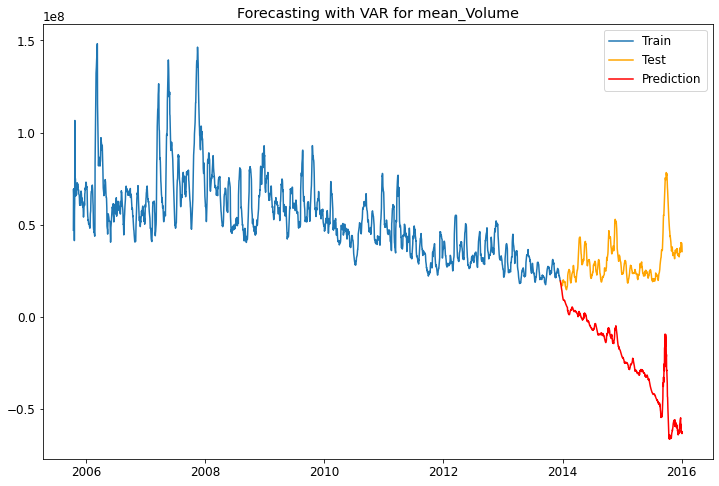

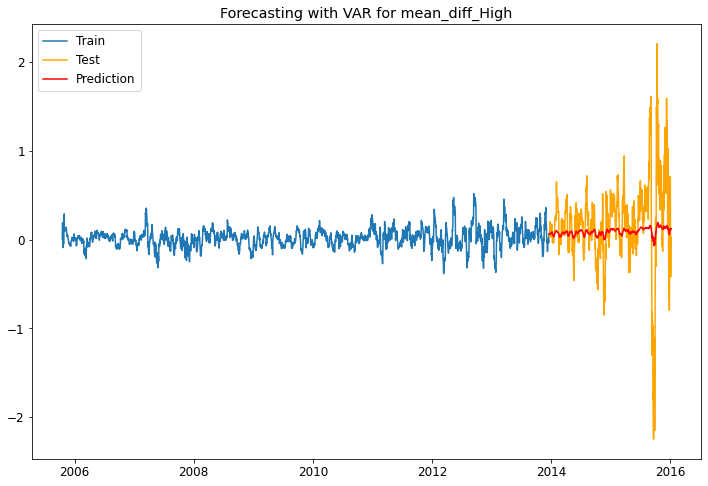

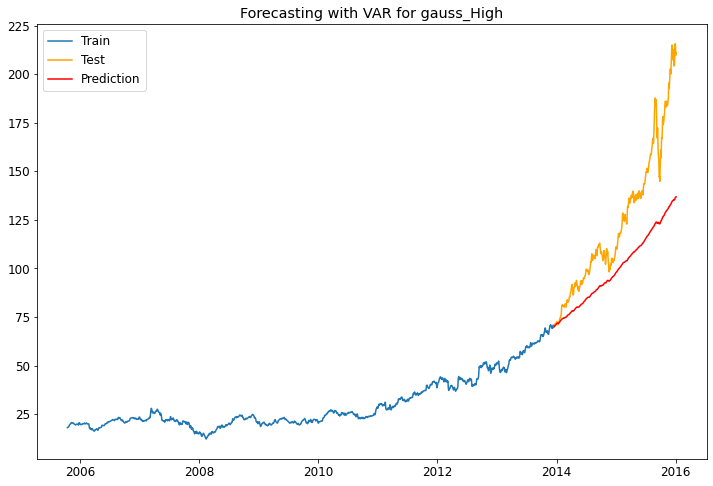

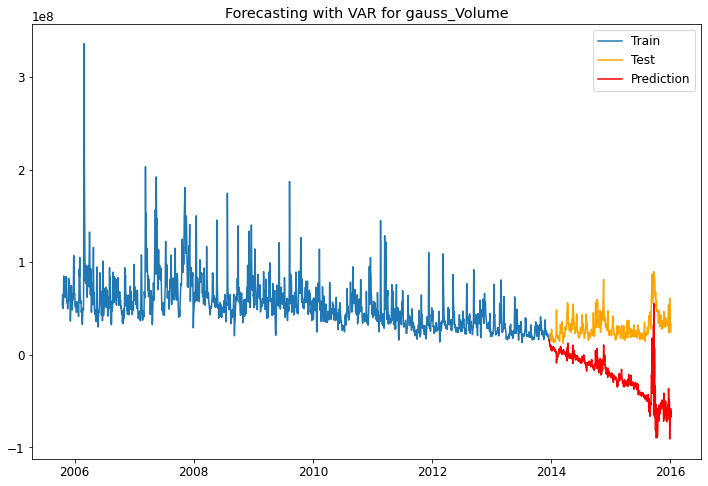

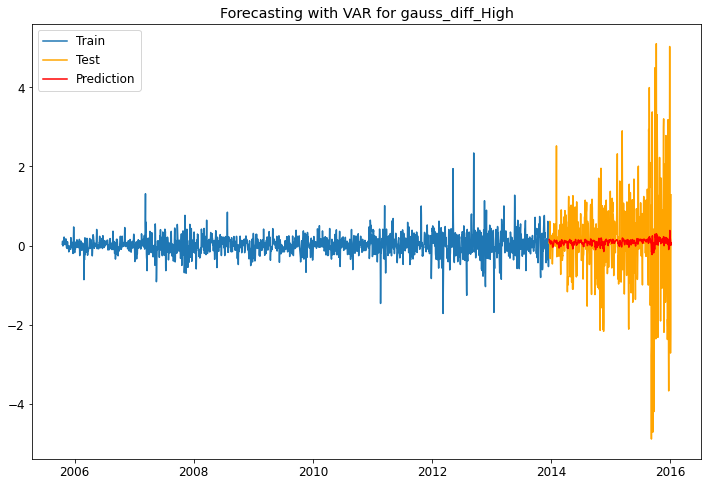

In [45]:
i = 0

for item in target_list:

    predict = model_fit.forecast(model_fit.endog, 747, exog_future=X_test)[:,i]
    i+=1
    
    plt.figure(figsize=(12, 8))
    plt.plot(list(X_train.index.values), list(y_train[item].values))
    plt.plot(list(X_test.index.values), list(y_test[item].values), color = 'orange')
    plt.plot(list(X_test.index.values), predict, color="red")
    plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
    plt.title(f'Forecasting with VAR for {item}')
    


In [31]:
residuals = model_fit.resid
print(f'Residuals mean: {residuals.mean()} \n\nResiduals std: {residuals.std()}\n')

Residuals mean: High               8.155371e-13
Volume             3.170552e-04
diff_High          1.042999e-11
mean_High         -2.218046e-12
mean_Volume       -1.927729e-04
mean_diff_High    -2.677701e-12
gauss_High         1.223999e-11
gauss_Volume       9.600774e-04
gauss_diff_High   -1.125782e-11
dtype: float64 

Residuals std: High               5.869950e-02
Volume             1.431229e+07
diff_High          5.869950e-02
mean_High          3.044962e-02
mean_Volume        2.098560e+06
mean_diff_High     2.584015e-02
gauss_High         7.357025e-02
gauss_Volume       8.553211e+06
gauss_diff_High    7.357083e-02
dtype: float64

